# Business Problem

As a marketing agency, our primary goal is to maximize the return on investment for our Clients' advertising campaigns. Here we have conducted two ad campaigns, one on Facebook and the other one on Adwords, and we need to determine which platform yields better results in term of clicks, coversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more effectively and optimize our advertising stretegies to deliver better outcomes for our clients.


# Research Question

### **Which Ad Platform is more effective in terms of conversions, clicks, and overall cost-effeciveness?**

# Importing Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

# Data Description

The dataset includes information comparing the results of two different advertising campaigns that were run in 2019. The information specifically pertains to an AdWords Ad campaign and a Facebook Ad campaign. A total of 365 lines of campaign data are available for analysis, with a row in the dataset for each day of 2019. The dataset offers insights into the efficacy and efficiency of each ad campaign over time by including a variety of performance variables.

Key features included in the dataset are as follows:

* Date: The date corresponding to each row of campaign data, ranging from January 1st, 2019, to December 31st, 2019.
* Ad Views: The number of times the ad was viewed.
* Ad Clicks: The number of clicks received on the ad.
* Ad Conversions: The number of conversions resulting from the ad.
* Cost per Ad: The cost associated with running the Facebook ad campaign.
* Click-Through Rate (CTR): The ratio of clicks to views, indicating the effectiveness of the ad in generating clicks.
* Conversion Rate: The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.
* Cost per Click (CPC): The average cost incurred per click on the ad.

In [4]:
df = pd.read_csv("marketing_campaign_data.csv")

In [5]:
df.sample(5)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
113,4/24/2019,FB_Apr19,1744,19,8,$90,1.09%,41.05%,$4.75,AW_Apr19,5096,60,7,$157,1.18%,11.68%,$2.62
245,9/3/2019,FB_Sep19,2836,29,7,$131,1.02%,23.47%,$4.55,AW_Sep19,3820,74,8,$87,1.94%,10.39%,$1.17
304,11/1/2019,FB_Nov19,1642,71,16,$48,4.31%,22.83%,$0.68,AW_Nov19,4442,75,8,$102,1.70%,10.30%,$1.36
341,12/8/2019,FB_Dec19,2675,67,15,$117,2.49%,23.00%,$1.76,AW_Dec19,4837,44,3,$177,0.90%,7.29%,$4.04
347,12/14/2019,FB_Dec19,1140,46,13,$46,3.99%,28.79%,$1.00,AW_Dec19,4786,59,5,$97,1.23%,8.40%,$1.65


In [6]:
df.shape

(365, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign                        

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


# Compare Both Campaigns Performance

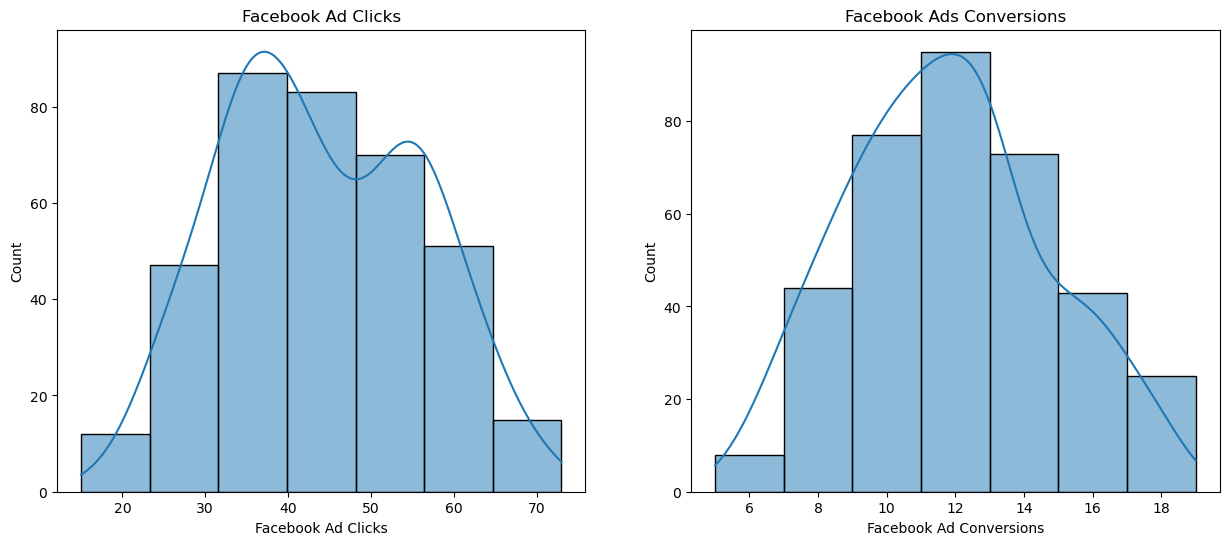

KeyError: 'AdWords Ad Clicks'

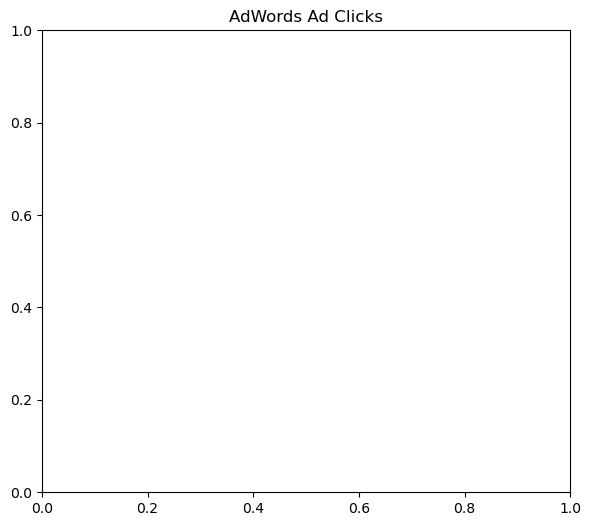

In [104]:
# distribution of the clicks and conversions
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'], bins=7, edgecolor='k', kde=True)
plt.subplot(1,2,2)
plt.title('Facebook Ads Conversions')
sns.histplot(df['Facebook Ad Conversions'], bins=7, edgecolor='k', kde=True)
plt.show()


plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'], bins=7, edgecolor='k', kde=True)
plt.subplot(1,2,2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'], bins=7, edgecolor='k', kde=True)
plt.show()

All the histogram are showing somewhat symmetrical shape. This symmetrical shape suggeststhat no. of clicks and conversions is relatively evenly distributed. In other words, there are not many clicks or conversions  that are outliers on either the high or low end.

### How frequently do we observe days with high numbers of coversions compared to days with low numbers of conversions?

In [37]:
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')

In [38]:
df[['Facebook Ad Conversions', 'Facebook Conversion Category', 'AdWords Ad Conversions', 'AdWords Conversion Category']].head()

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6 - 10,5,less than 6
1,12,10 - 15,6,6 - 10
2,8,6 - 10,4,less than 6
3,9,6 - 10,5,less than 6
4,7,6 - 10,7,6 - 10


In [39]:
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
10 - 15         189
6 - 10          128
more than 15     47
less than 6       1
Name: count, dtype: int64

In [40]:
facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns={'Facebook Conversion Category' : 'Category'})
facebook

,Category,count
0,10 - 15,189
1,6 - 10,128
2,more than 15,47
3,less than 6,1


In [41]:
adwords = pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns={'AdWords Conversion Category' : 'Category'})
adwords

,Category,count
0,6 - 10,209
1,less than 6,156


In [50]:
category_df = pd.merge(facebook, adwords, on= 'Category', how='outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 - 15,189,0.0
1,6 - 10,128,209.0
2,less than 6,1,156.0
3,more than 15,47,0.0


In [52]:
category_df = category_df.iloc[[2,1,0,3]]
category_df

,Category,count_x,count_y
2,less than 6,1,156.0
1,6 - 10,128,209.0
0,10 - 15,189,0.0
3,more than 15,47,0.0


In [53]:
X_axis = np.arange(len(category_df)) 
X_axis

array([0, 1, 2, 3])

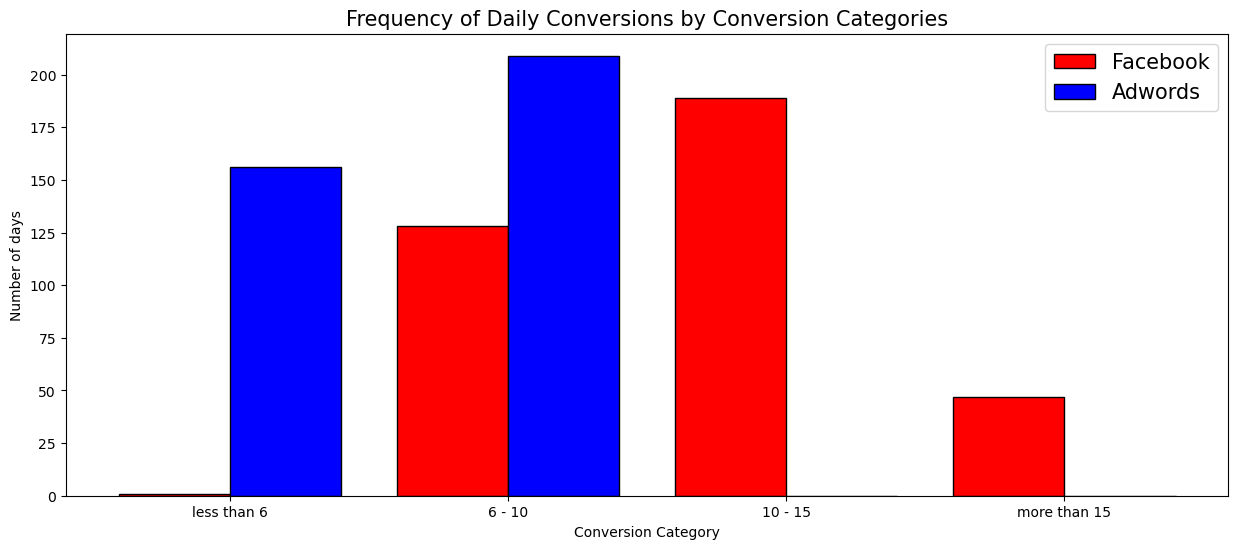

In [62]:
X_axis = np.arange(len(category_df)) 
plt.figure(figsize = (15,6))
plt.bar(X_axis - 0.2, category_df['count_x'], 0.4, label = 'Facebook', color = '#FF0000', linewidth = 1, edgecolor = 'k') 
plt.bar(X_axis + 0.2, category_df['count_y'], 0.4, label = 'Adwords', color = '#0000FF', linewidth = 1, edgecolor = 'k') 
  
plt.xticks(X_axis, category_df['Category']) 
plt.xlabel("Conversion Category") 
plt.ylabel("Number of days") 
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize = 15) 
plt.legend(fontsize = 15) 
plt.show() 

* The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or moderate ones (6 - 10).
* There is a significant variance in the number of high-conversion days between two different campaigns.
* The absence of any days with conversions between 10 - 15 and more than 15 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.

#### Do more clicks on the ad really lead to more sales

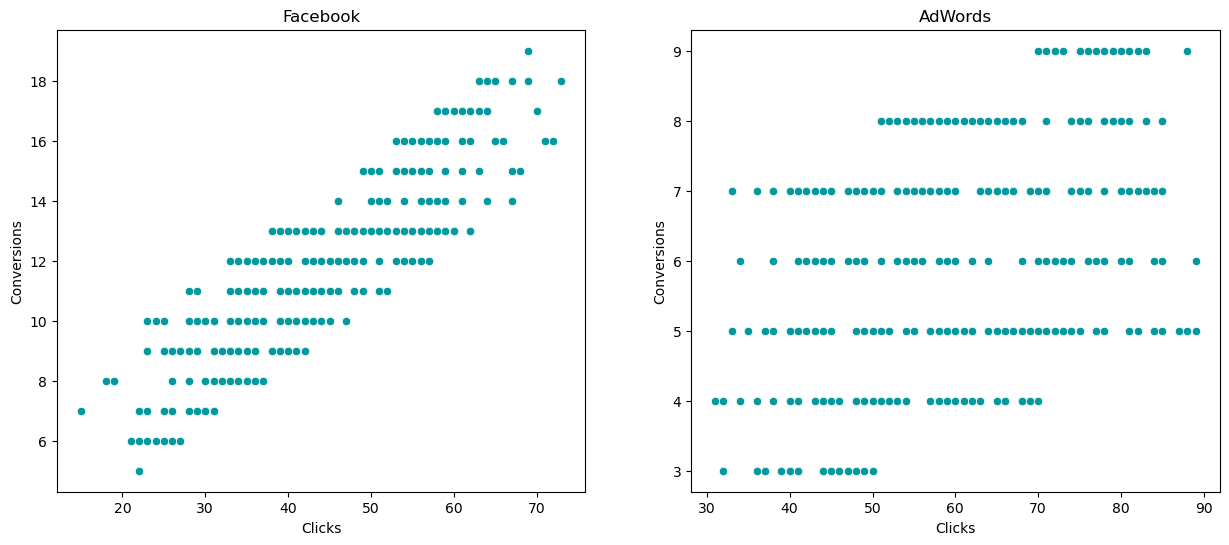

In [63]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x = df['AdWords Ad Clicks'],y = df['AdWords Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

In [64]:
facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [66]:
adwords_corr = df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


In [68]:

print('Correlation Coeff \n')
print('Facebook :',round(facebook_corr.values[0,1],2))
print('AdWords : ',round(adwords_corr.values[0,1],2))

Correlation Coeff 

Facebook : 0.87
AdWords :  0.45


* With a correlation coefficient of 0.87, there's a strong positive link between the number of clicks on Facebook ads and resulting sales. This means that as more people engage with these ads, sales are likely to rise too.
* This significant correlation highlights that Facebook ads are playing a key role in boosting sales. A large part of the sales variation can be traced back to changes in ad engagement, making them a powerful marketing tool.
* Since the data shows a strong connection between Facebook ad clicks and sales, it suggests that investing further in these ads—or enhancing their performance—could lead to even better sales outcomes.
* On the other hand, a correlation coefficient of 0.45 for AdWords ads indicates a moderate positive relationship with sales. There is still a positive impact, but not as pronounced as with Facebook ads.
* This moderate association implies that while AdWords does help drive sales, its performance might be affected by additional factors. A deeper look into those influences could help fine-tune the effectiveness of AdWords campaigns.

# Hypothesis Testing

**Context**: We are trying to determine whether running ads on Facebook actually leads to more conversions compared to using Google AdWords.

**Claim** (What we want to test):
We believe that Facebook ads generate more conversions than AdWords.

**Null Hypothesis (H₀)**:
There’s no improvement with Facebook, or AdWords performs equally well or even better. In simpler terms, the average number of conversions through Facebook is less than or equal to that from AdWords.

**Mathematically**:<br>
H₀: Average conversions from Facebook ≤ Average conversions from AdWords

**Alternative Hypothesis (H₁)**:
Facebook does better — it leads to more conversions on average than AdWords.

**Mathematically**:<br>
H₁: Average conversions from Facebook > Average conversions from AdWords

In [72]:
print('Mean Conversion \n')
print('Facebook :', round(df['Facebook Ad Conversions'].mean(),2))
print('AdWords :', round(df['AdWords Ad Conversions'].mean(),2))

t_stats, p_value = st.ttest_ind(a = df['Facebook Ad Conversions'], b = df['AdWords Ad Conversions'], equal_var = False)
print('\nT statistic', t_stats, '\np-value',p_value)

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Mean Conversion 

Facebook : 11.74
AdWords : 5.98

T statistic 32.88402060758184 
p-value 9.348918164530465e-134

p-value is less than significance value, Reject the null hypothesis


* Based on the data analyzed, Facebook ads seem to drive significantly more conversions on average (11.74) compared to AdWords ads (5.98). This difference suggests that Facebook may be a more effective platform for generating user actions or sales.
* The T-statistic, which measures how distinct the average values are between the two platforms, came out to 32.88—a very large value that reflects a strong gap in performance. Additionally, the p-value obtained is incredibly small (9.35e-134), indicating that the observed difference is statistically significant and unlikely to have occurred by random chance.
* These findings provide strong support for the idea that Facebook ads outperform AdWords in terms of conversions. Given this insight, it might be worth considering a strategic shift in marketing efforts—such as allocating more budget toward Facebook campaigns, refining audience targeting, or trying out new ad creatives to further leverage Facebook's strengths in driving results.



#  Regression Analysis

#### What will happen when I do go with the Facebook Ad? How many facebook ad conversions can I expect given a certain number of facebook ad clicks?

In [74]:
# independent variable
X = df[['Facebook Ad Clicks']]

# dependent variable
y = df[['Facebook Ad Conversions']]

# initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

# model evaluation
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score):',round(r2,2),'%')
print('Mean Squared Error:', round(mse,2))

Accuracy (R2 Score): 76.35 %
Mean Squared Error: 2.02


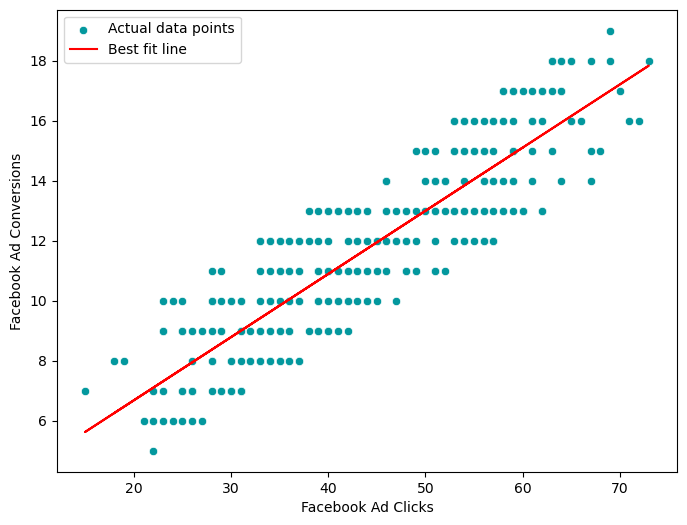

In [101]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color = '#FF0000', label = 'Best fit line')
plt.legend()
plt.show()

In [76]:
print(f'For {50} Clicks, Expected Conversion : {round(reg_model.predict([[50]])[0][0],2)}')
print(f'For {80} Clicks, Expected Conversion : {round(reg_model.predict([[80]])[0][0],2)}')

For 50 Clicks, Expected Conversion : 13.0
For 80 Clicks, Expected Conversion : 19.31


* The model demonstrates solid predictive capability, achieving an R² score of 76.35%. This indicates that it can reliably estimate Facebook ad conversions based on the number of ad clicks.
* These findings from the Linear Regression model can support smarter business decisions around resource distribution, budget management, and campaign fine-tuning.
* For example, being able to anticipate conversion rates from a given volume of ad clicks allows marketers to set practical campaign targets, use their advertising budget more efficiently, and better evaluate the return on investment from Facebook ads.

# Analyzing Facebook Campaign metrics over time.

In [78]:
# cleaning data ( removing unwanted symbols from the columns and converting them to numerical columns)
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float(x[1:]))

In [79]:
# filtering for facebook campaign
df = df[['Date','Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)']]

In [80]:
df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91
2,2019-01-03,3105,26,8,102.0,0.84,31.45,3.89
3,2019-01-04,1107,27,9,71.0,2.45,34.76,2.62
4,2019-01-05,1317,15,7,78.0,1.10,47.59,5.38


### At what times of the month or days of the week do we observe the conversions?

In [81]:
# extracting month and week day from the date column
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.weekday

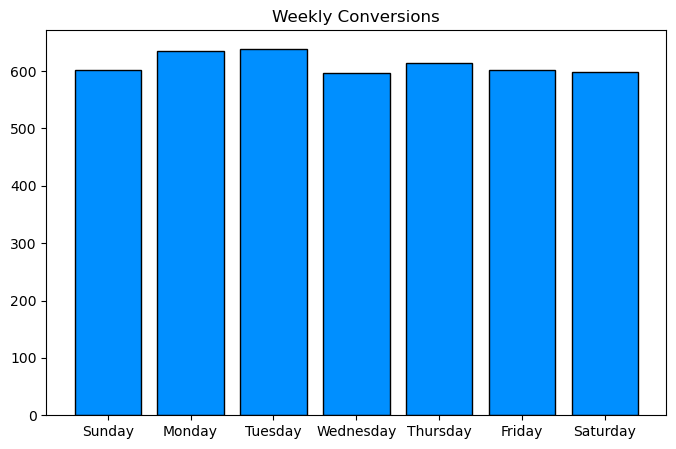

In [90]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversion = df.groupby('week')[['Facebook Ad Conversions']].sum()
week_names= ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'], color = '#008FFF', edgecolor = 'k')
plt.show()

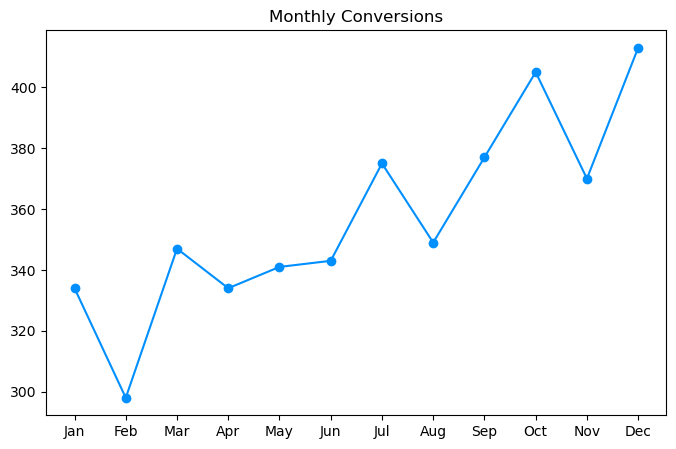

In [94]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'],'-o', color = '#008FFF')
plt.show()

* Over the course of the year, conversion numbers remain fairly steady across the weekdays, suggesting that user engagement doesn't drastically fluctuate based on the day. That said, there’s a clear trend showing that Mondays and Tuesdays consistently outperform other days in terms of conversions. This pattern hints that users may be more responsive or active at the start of the workweek, potentially due to fresh motivation or targeted marketing early on.
* Looking at the broader monthly pattern, there's a general upward trend in conversions, reflecting steady growth. However, a few months—specifically February, April, May, June, August, and November—see noticeable dips. These declines could stem from seasonal trends, shifts in consumer habits, or even strategic changes in marketing during those periods.

### How does the Cost Per Conversion (CPC) trend over time?

Cost Per Conversion (CPC) : It is a key metric that helps marketers assess how efficiently their ad spend is leading to actual results—like purchases, sign-ups, or other desired actions. By tracking CPC, businesses can fine-tune their budget and audience targeting to get better returns from their campaigns.

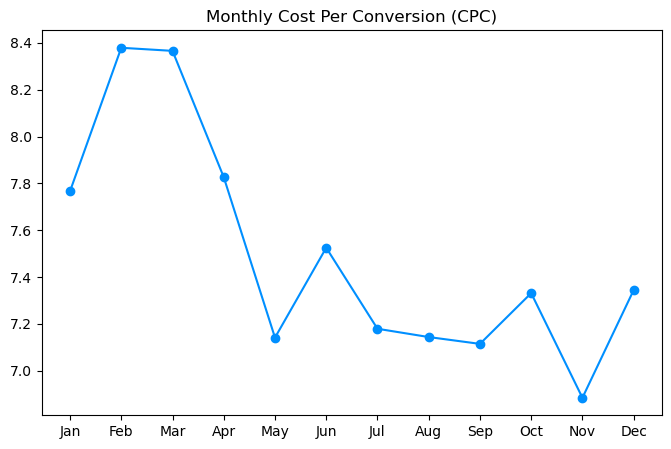

In [96]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC)')
monthly_df = df.groupby('month')[['Facebook Ad Conversions','Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad']/monthly_df['Facebook Ad Conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'],'-o', color = '#008FFF')
plt.show()

* The CPC trend over the 12-month period shows some fluctuations but overall maintains a relatively stable range.
* May and November have the lowest CPC values, indicating potentially more cost-effective advertising or higher conversion rates during these periods.
* February has the highest CPC value, suggesting that advertising costs may be relatively higher during this month compared to others.
* Lower CPC values in certain months (e.g., May and November) could indicate periods of higher advertising effectiveness or more favorable market conditions.
* Consider allocating more advertising budget to months with historically lower CPC values (e.g., May and November) to maximize ROI.

#### Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?

In [97]:
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Cointegration test score:', score)
print('P-value:', p_value)
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Cointegration test score: -14.755428385103224
P-value: 2.1337375979060563e-26

p-value is less than significance value, Reject the null hypothesis


* Because the p-value falls well below the selected threshold for significance, we can confidently reject the null hypothesis. This suggests there's a consistent, long-term connection between advertising costs and conversion rates.
* For businesses, recognizing this steady relationship means they can fine-tune their marketing strategies. By focusing on campaigns that yield solid returns and adjusting ad spend based on what’s working, they can drive more conversions while keeping expenses in check.